In [1]:
import diffusion

import numpy as np
import scipy.optimize
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
fuel = diffusion.Material(num_energy_groups=2)

fuel.diffusion = [1.263000, 0.354000]
fuel.total = [0.012000+0.014000, 0.121000 ]
fuel.scattering = [[0.0, 0.014000], [0.0, 0.0]]
fuel.nu_fission = [0.008476, 0.185000]
fuel.chi = [1.0, 0.0]

refl = diffusion.Material(num_energy_groups=2)

refl.diffusion = [1.130000, 0.160000]
refl.total = [0.000400+0.049000, 0.020000]
refl.scattering = [[0.0, 0.049000], [0.0, 0.0]]
refl.nu_fission = [0.0, 0.0]
refl.chi = [1.0, 0.0]

materials = diffusion.Materials(num_materials=2, num_energy_groups=2)
materials.set_material(fuel, 0)
materials.set_material(refl, 1)

mesh = diffusion.Mesh(num_parts=2)
mesh.material_map = [0, 1]
mesh.part_sizes = [80., 14.]
mesh.part_mesh = [160, 140]
mesh.left_boundary = "reflective"
mesh.right_boundary = "zero"

solver = diffusion.Solver(materials, mesh)
solver.solve()

eigs = solver.extract_eigenvalues()
slab_x, fluxes = solver.extract_eigenvectors()
print eigs[0]

1.1315679346


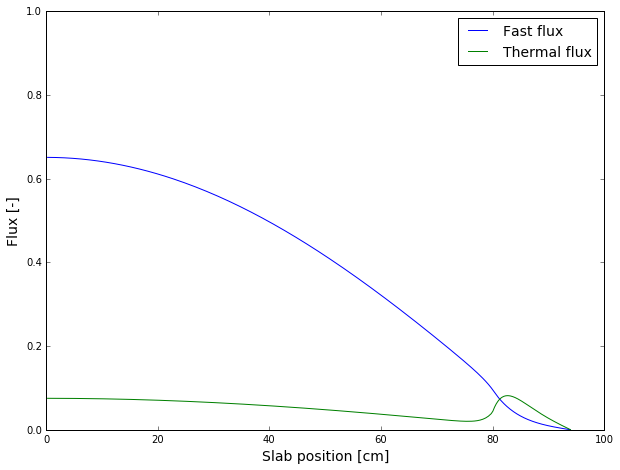

In [3]:
fig, ax = plt.subplots(figsize=(10, 7.5))

ax.plot(slab_x, fluxes[0,:,0], label="Fast flux")
ax.plot(slab_x, fluxes[1,:,0], label="Thermal flux")
ax.set_xlabel("Slab position [cm]", fontsize=14)
ax.set_ylabel("Flux [-]", fontsize=14)
ax.set_ylim(0.0, 1.0)
ax.legend(fontsize=14)

In [4]:
print 2.735834/0.316256, fluxes[0,0,0]/fluxes[1,0,0]

8.65069437418 8.65065764393
